In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf
images_loc = []
labels = []
import cv2

def process_image(image_path, IMG_SIZE=224):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    # Convert the image from BGR to RGB (OpenCV reads images in BGR format)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Resize the image
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    # Convert the image to float32 and normalize its values
    image = image.astype('float32') / 255.0
    return image


In [15]:
#!pip install opencv-python

In [16]:
import os

# Assuming you have defined the process_image function

images_loc = []
labels = []

# Process cardboard images
for i in os.listdir("archive/Garbage classification/Garbage classification/cardboard"):
    images_loc.append(process_image("archive/Garbage classification/Garbage classification/cardboard/" + i))
    labels.append(0)

# Process glass images
for i in os.listdir("archive/Garbage classification/Garbage classification/glass"):
    images_loc.append(process_image("archive/Garbage classification/Garbage classification/glass/" + i))
    labels.append(1)

# Process metal images
for i in os.listdir("archive/Garbage classification/Garbage classification/metal"):
    images_loc.append(process_image("archive/Garbage classification/Garbage classification/metal/" + i))
    labels.append(2)

# Process paper images
for i in os.listdir("archive/Garbage classification/Garbage classification/paper"):
    images_loc.append(process_image("archive/Garbage classification/Garbage classification/paper/" + i))
    labels.append(3)

# Process plastic images
for i in os.listdir("archive/Garbage classification/Garbage classification/plastic"):
    images_loc.append(process_image("archive/Garbage classification/Garbage classification/plastic/" + i))
    labels.append(4)

# Process trash images
for i in os.listdir("archive/Garbage classification/Garbage classification/trash"):
    images_loc.append(process_image("archive/Garbage classification/Garbage classification/trash/" + i))
    labels.append(5)

classnames = np.array(["cardboard", "glass", "metal", "paper", "plastic", "trash"])

images_loc = np.array(images_loc)
labels = np.array(labels)


In [17]:
#!pip install tensorboard==1.14.0

In [18]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets (70% train, 30% test)
X_train, X_testy, y_train, y_testy = train_test_split(images_loc, labels, test_size=0.3)

# Further split test set into validation and final test sets (50% validation, 50% test)
X_val, X_test, y_val, y_test = train_test_split(X_testy, y_testy, test_size=0.5)

# Print the length of the final test set
print("Length of X_test:", len(X_test))
print("Length of y_test:", len(y_test))


Length of X_test: 380
Length of y_test: 380


In [19]:
import matplotlib.pyplot as plt
def show_25_images(images, labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
        ax=plt.subplot(5,5,i+1)
        plt.imshow(images[i])
        plt.title(classnames[labels[i]])
        plt.axis("off")

AttributeError: module 'tensorflow' has no attribute '__version__'

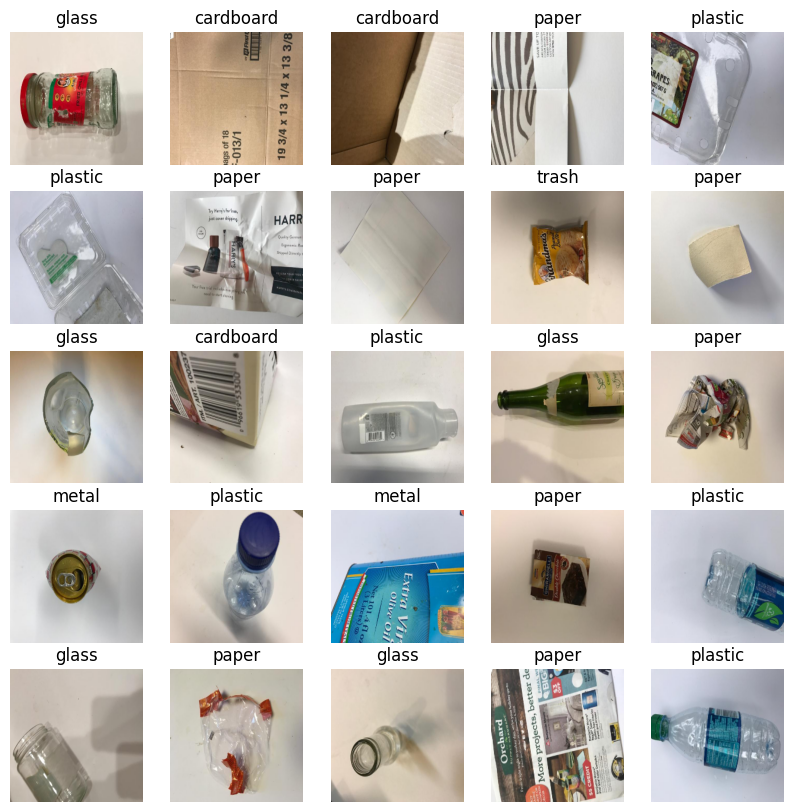

In [20]:
import kagglehub


show_25_images(X_train, y_train)

import tensorflow_hub as hub

# Define the URL for the MobileNetV2 model
mobilenet_v2_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4"

# Create a functional model with MobileNetV2 as the first layer
def create_model(input_shape):
    input_layer = tf.keras.layers.Input(shape=input_shape)
    feature_extractor = hub.KerasLayer(mobilenet_v2_url, trainable=True)(input_layer)
    output_layer = tf.keras.layers.Dense(6, activation='softmax')(feature_extractor)
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    return model

# Create the model
model = create_model(input_shape=(224, 224, 3))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


In [11]:
!pip install kagglehub

In [13]:
model.fit(x = X_train,
          y = y_train,
          epochs=100,
          validation_data = (X_val, y_val))

model.evaluate(X_test, y_test)

model.save("mobile_net_v2_model.h5")


AttributeError: 'str' object has no attribute 'fit'

In [ ]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/inception-resnet-v2/frameworks/TensorFlow2/variations/classification/versions/2")
])
m.add(tf.keras.layers.Dense(6, activation='softmax'))

m.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

m.summary()

In [ ]:
history = m.fit(x = X_train,
          y = y_train,
          epochs=100,
          validation_data = (X_val, y_val),
          batch_size = 32)

loss, acc = m.evaluate(X_test, y_test)
print("The accuracy of the model is {:.3f}\nThe Loss in the model is {:.3f}".format(acc,loss))

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(hisData,train,test):
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [ ]:
# show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')

model.save("resnet.h5")

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

input_shape = (224, 224, 3)
num_classes = 6

model_cnn = Sequential()

model_cnn = Sequential()

model_cnn.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape, activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(BatchNormalization())
model_cnn.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(BatchNormalization())
model_cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(num_classes, activation='softmax'))

model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_cnn.summary()

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

model_cnn.fit(x = X_train,
          y = y_train,
          epochs=100,
          validation_data = (X_val, y_val),
          batch_size = 32,
          callbacks=[checkpoint_callback])

model_cnn.evaluate(X_test, y_test)

from PIL import Image
img_path = input("Enter the image path for prediction : ")
image = process_image(img_path)
image = np.expand_dims(image, axis=0)
p = np.argmax(resnet.predict(image))
a = plt.imread(img_path)
plt.title(f"Prediction : {classnames[p]}")
plt.imshow(a)
